# Project 2: Topic Classification

In this project, you'll work with text data from newsgroup postings on a variety of topics. You'll train classifiers to distinguish between the topics based on the text of the posts. Whereas with digit classification, the input is relatively dense: a 28x28 matrix of pixels, many of which are non-zero, here we'll represent each document with a "bag-of-words" model. As you'll see, this makes the feature representation quite sparse -- only a few words of the total vocabulary are active in any given document. The bag-of-words assumption here is that the label depends only on the words; their order is not important.

The SK-learn documentation on feature extraction will prove useful:
http://scikit-learn.org/stable/modules/feature_extraction.html

Each problem can be addressed succinctly with the included packages -- please don't add any more. Grading will be based on writing clean, commented code, along with a few short answers.

As always, you're welcome to work on the project in groups and discuss ideas on the course wall, but please prepare your own write-up and write your own code.

In [3]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# General libraries.
import re
import numpy as np
import matplotlib.pyplot as plt

# SK-learn libraries for learning.
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.grid_search import GridSearchCV

# SK-learn libraries for evaluation.
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn import metrics
from sklearn.metrics import classification_report

# SK-learn library for importing the newsgroup data.
from sklearn.datasets import fetch_20newsgroups

# SK-learn libraries for feature extraction from text.
from sklearn.feature_extraction.text import *

/Users/klomurray/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/klomurray/anaconda3/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


Load the data, stripping out metadata so that we learn classifiers that only use textual features. By default, newsgroups data is split into train and test sets. We further split the test so we have a dev set. Note that we specify 4 categories to use for this project. If you remove the categories argument from the fetch function, you'll get all 20 categories.

In [5]:
categories = ['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space']
newsgroups_train = fetch_20newsgroups(subset='train',
                                      remove=('headers', 'footers', 'quotes'),
                                      categories=categories)
newsgroups_test = fetch_20newsgroups(subset='test',
                                     remove=('headers', 'footers', 'quotes'),
                                     categories=categories)

num_test = int(len(newsgroups_test.target)/2)
test_data, test_labels = newsgroups_test.data[num_test:], newsgroups_test.target[num_test:]
dev_data, dev_labels = newsgroups_test.data[:num_test], newsgroups_test.target[:num_test]
train_data, train_labels = newsgroups_train.data, newsgroups_train.target

print('training label shape:', train_labels.shape)
print('test label shape:', test_labels.shape)
print('dev label shape:', dev_labels.shape)
print('labels names:', newsgroups_train.target_names)

training label shape: (2034,)
test label shape: (677,)
dev label shape: (676,)
labels names: ['alt.atheism', 'comp.graphics', 'sci.space', 'talk.religion.misc']


(1) For each of the first 5 training examples, print the text of the message along with the label.

In [6]:
def P1(num_examples=5):
### STUDENT START ###
    
    for i in range(num_examples):
        print("Example:", i+1)
        print("\nLabel:", newsgroups_train.target_names[train_labels[i]])
        print("\nText of Message:\n\n", train_data[i])
        print('\n', '*'*60, '\n')

### STUDENT END ###
P1()

Example: 1

Label: comp.graphics

Text of Message:

 Hi,

I've noticed that if you only save a model (with all your mapping planes
positioned carefully) to a .3DS file that when you reload it after restarting
3DS, they are given a default position and orientation.  But if you save
to a .PRJ file their positions/orientation are preserved.  Does anyone
know why this information is not stored in the .3DS file?  Nothing is
explicitly said in the manual about saving texture rules in the .PRJ file. 
I'd like to be able to read the texture rule information, does anyone have 
the format for the .PRJ file?

Is the .CEL file format available from somewhere?

Rych

 ************************************************************ 

Example: 2

Label: talk.religion.misc

Text of Message:

 

Seems to be, barring evidence to the contrary, that Koresh was simply
another deranged fanatic who thought it neccessary to take a whole bunch of
folks with him, children and all, to satisfy his delusional mania. 

(2) Use CountVectorizer to turn the raw training text into feature vectors. You should use the fit_transform function, which makes 2 passes through the data: first it computes the vocabulary ("fit"), second it converts the raw text into feature vectors using the vocabulary ("transform").

The vectorizer has a lot of options. To get familiar with some of them, write code to answer these questions:

a. The output of the transform (also of fit_transform) is a sparse matrix: http://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.sparse.csr_matrix.html. What is the size of the vocabulary? What is the average number of non-zero features per example? What fraction of the entries in the matrix are non-zero? Hint: use "nnz" and "shape" attributes.

b. What are the 0th and last feature strings (in alphabetical order)? Hint: use the vectorizer's get_feature_names function.

c. Specify your own vocabulary with 4 words: ["atheism", "graphics", "space", "religion"]. Confirm the training vectors are appropriately shaped. Now what's the average number of non-zero features per example?

d. Instead of extracting unigram word features, use "analyzer" and "ngram_range" to extract bigram and trigram character features. What size vocabulary does this yield?

e. Use the "min_df" argument to prune words that appear in fewer than 10 documents. What size vocabulary does this yield?

f. Using the standard CountVectorizer, what fraction of the words in the dev data are missing from the vocabulary? Hint: build a vocabulary for both train and dev and look at the size of the difference.

In [7]:
def P2():
### STUDENT START ###
    cv = CountVectorizer()
    cv_feature=cv.fit_transform(train_data)
    
    print("a.")
    print("Size of vocabulary: ", cv_feature.shape[1])
    print("Non-zero entries: ", cv_feature.nnz/len(train_data))
    print("Fraction non-zero entries: ", float(cv_feature.nnz) / (cv_feature.shape[0] * cv_feature.shape[1]))

    
    print("\nb.")
    print("First Feature: ", cv.get_feature_names()[0])
    print("Last Feature: ", cv.get_feature_names()[-1])
    
    print("\nc. ")
    cv2 = CountVectorizer(vocabulary=["atheism","graphics","space","religion"])
    cv_feature2 = cv2.fit_transform(train_data)
    print("Shape: ", cv_feature2.shape[1])
    print('Average number of non-zero features per example: ', cv_feature2.nnz/float(cv_feature2.shape[0]))
    
    print("\nd.")
    cv3 = CountVectorizer(ngram_range =(2,3), analyzer='char')
    bi_tri_feature3 = cv3.fit_transform(train_data)  
    print("Vocaculary size: ", bi_tri_feature3.shape[1])
    
    print("\ne. ")
    cv4=CountVectorizer(min_df=10)
    cv_feature_min_df=cv4.fit_transform(train_data)
    print("With pruning, size of vocabulary:",cv_feature_min_df.shape[1])
          
    print("\nf.") 
    cv = CountVectorizer()
    cv_feature=cv.fit_transform(train_data)
    train_vocab=cv.vocabulary_
    dev_feature=cv.fit_transform(dev_data)
    dev_vocab=cv.vocabulary_
    print("Fraction of the words in the dev data missing not in training dataset: ", 
        sum(list(map(lambda x: x not in train_vocab,list(dev_vocab.keys()))))/len(dev_vocab))

    ### STUDENT END ###
P2()

a.
Size of vocabulary:  26879
Non-zero entries:  96.70599803343165
Fraction non-zero entries:  0.0035978272269590263

b.
First Feature:  00
Last Feature:  zyxel

c. 
Shape:  4
Average number of non-zero features per example:  0.26843657817109146

d.
Vocaculary size:  35478

e. 
With pruning, size of vocabulary: 3064

f.
Fraction of the words in the dev data missing not in training dataset:  0.24787640034470024


(3) Use the default CountVectorizer options and report the f1 score (use metrics.f1_score) for a k nearest neighbors classifier; find the optimal value for k. Also fit a Multinomial Naive Bayes model and find the optimal value for alpha. Finally, fit a logistic regression model and find the optimal value for the regularization strength C using l2 regularization. A few questions:

a. Why doesn't nearest neighbors work well for this problem?

b. Any ideas why logistic regression doesn't work as well as Naive Bayes?

c. Logistic regression estimates a weight vector for each class, which you can access with the coef\_ attribute. Output the sum of the squared weight values for each class for each setting of the C parameter. Briefly explain the relationship between the sum and the value of C.

In [9]:
def P3():
### STUDENT START ###

    cv=CountVectorizer()
    train_cv=cv.fit_transform(train_data)
    dev_cv=cv.transform(dev_data)
 
    train_data_matrix = cv.transform(train_data)
    dev_data_matrix = cv.transform(dev_data)
    
    #KNN
    #Use GridSearch to find optimal KNN
    num = np.arange(1,(len(dev_data) + 1))
    n_range = {'n_neighbors': num}
    knn = KNeighborsClassifier()
    knn_clf = GridSearchCV(knn, n_range)
    knn_clf.fit(train_data_matrix, train_labels)
    print('Optimal k:', knn_clf.best_params_)
    
    #Identify F-Score for opimal KNN
    knn_clf1 = KNeighborsClassifier(n_neighbors = knn_clf.best_params_['n_neighbors'])
    knn_clf1.fit(train_data_matrix, train_labels)
    knn_clf_preds = knn_clf1.predict(dev_data_matrix)
    print('KNN f1 score for k = {0} is {1}'.format(knn_clf.best_params_['n_neighbors'],
        metrics.f1_score(y_true = dev_labels, y_pred = knn_clf_preds, average="macro")))

    # Multinomial Naive Bayes
    alphas = {'alpha': [0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]}
    mnb_clf = MultinomialNB()
    clf = GridSearchCV(mnb_clf, alphas)
    clf.fit(train_data_matrix, train_labels)
    print('\nOptimal alpha for MNB: ', clf.best_params_)
    
    mnb_clf = MultinomialNB(alpha = clf.best_params_['alpha'])
    mnb_clf.fit(train_data_matrix, train_labels)
    mnb_clf_preds = mnb_clf.predict(dev_data_matrix)
    print('MNB f1-score for optimal alpha is:', 
          metrics.f1_score(y_true = dev_labels, y_pred = mnb_clf_preds, average="macro"))

    #Logistic Regression
    C = {'C': [0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]}
    
    log_clf = LogisticRegression(penalty = 'l2')
    clf = GridSearchCV(log_clf, C)
    clf.fit(train_data_matrix, train_labels)
    log_clf_preds = clf.predict(dev_data_matrix)
    print('\nOptimal C for LR: ', clf.best_params_)
    print('Logistic Regression f1 Score for C = {0} is {1}'.format(clf.best_params_['C'],
        metrics.f1_score(y_true = dev_labels, y_pred = log_clf_preds, average="macro")))
    
    #Print sum of the squared weight values for each class 
    for c in C['C']:
        log_clf = LogisticRegression(penalty = 'l2', C = c)
        log_clf.fit(train_data_matrix, train_labels)
        log_clf_preds = log_clf.predict(dev_data_matrix)
        print("C: ", c, ";\tSum of Squared weights:\t", np.sum(log_clf.coef_**2, axis=1))
    
    
### STUDENT END ###
P3()

Optimal k: {'n_neighbors': 151}
KNN f1 score for k = 151 is 0.4028149344405508

Optimal alpha for MNB:  {'alpha': 0.01}
MNB f1-score for optimal alpha is: 0.7552894198013128

Optimal C for LR:  {'C': 0.5}
Logistic Regression f1 Score for C = 0.5 is 0.6920151915112704
C:  0.0001 ;	Sum of Squared weights:	 [0.00770175 0.0119412  0.00943508 0.00910284]
C:  0.001 ;	Sum of Squared weights:	 [0.16509345 0.20095275 0.18067094 0.18724278]
C:  0.01 ;	Sum of Squared weights:	 [2.54148768 2.93970937 2.8624691  2.25002919]
C:  0.1 ;	Sum of Squared weights:	 [27.13623511 24.65956732 27.45872348 23.02600455]
C:  0.5 ;	Sum of Squared weights:	 [102.51345719  83.10215817  98.9828885   89.00084388]
C:  1.0 ;	Sum of Squared weights:	 [166.94186105 130.89897162 157.91550429 145.74696578]
C:  2.0 ;	Sum of Squared weights:	 [257.43567163 197.83380949 239.94818001 226.51650405]
C:  10.0 ;	Sum of Squared weights:	 [586.54870411 448.43848855 538.92744264 530.92736584]


ANSWER:

a) In this case we have a sparse matrix. KNN doesn't perform well in this space where the KNN uses the value of features to calculate the distance between them. In this case, see P2, we have almost 25% of features in the dev data missing from the training dataset. Due to the nature of the problem, having the dev data not be represented in the training data, results in a poor fit for the KNN model. 

b) In this case the number of observations is too low for logistic regression to out perform naive bayes. Due to the smallish number of observations, logistic regression overfits the training data. Since Naive Bayes assumes indepedence between features it performs better. Potentially, if we had a larger sample logistic regression would likely improve. 

c) C is the inverse of the regularization strength. Regularization penalizes large coefficients to reduce overfitting. Small C values will increase the regularization strength, which creates simpler models that under fit the data. As C increases, the squared error also increases. Since smaller values of C correspond to smaller maginitudes of error we end up with smaller squared weights. As C increases we have larger error due to more complicated models, which increases the squared weights.  

(4) Train a logistic regression model. Find the 5 features with the largest weights for each label -- 20 features in total. Create a table with 20 rows and 4 columns that shows the weight for each of these features for each of the labels. Create the table again with bigram features. Any surprising features in this table?

In [102]:
def P4():
### STUDENT START ###

    import pandas as pd
    
    def gram_feature(cv):
        cv
        feature_train = cv.fit_transform(train_data)
        feature_dev = cv.transform(dev_data)

        #C = 0.5 from P3
        log_reg = LogisticRegression(C = 0.5)
        log_reg.fit(feature_train, train_labels)
        vocab=np.array(cv.get_feature_names())

        inx=np.zeros(20,dtype=int)
        r_num = range(len(newsgroups_train.target_names))

        for i in r_num:
            log_reg_coef=log_reg.coef_[i,]
            ind1=np.array(log_reg_coef).argsort()[-5:][::-1]
            inx[i*5:(i+1)*5]=ind1

            print("Top Features: %s"%newsgroups_train.target_names[i])
            print(vocab[ind1])
            print("")

        dictionary={}
        for i in r_num:
            dictionary[newsgroups_train.target_names[i]]=log_reg.coef_[i,inx]
        table=pd.DataFrame(data=dictionary,index=vocab[inx])
        print( table)

    cv = CountVectorizer()
    gram_feature(cv)
    
    print("\nUsing bigram features")
    cv = CountVectorizer(ngram_range=(2, 2))
    gram_feature(cv)
    

### STUDENT END ###
P4()

Top Features: alt.atheism
['atheists' 'bobby' 'religion' 'atheism' 'deletion']

Top Features: comp.graphics
['graphics' 'image' 'file' '3d' 'computer']

Top Features: sci.space
['space' 'orbit' 'nasa' 'launch' 'spacecraft']

Top Features: talk.religion.misc
['christians' 'christian' 'blood' 'fbi' 'order']

            alt.atheism  comp.graphics  sci.space  talk.religion.misc
atheists       0.832119      -0.093456  -0.267107           -0.637606
bobby          0.823690      -0.191303  -0.286562           -0.387156
religion       0.798272      -0.508368  -0.658891           -0.050604
atheism        0.793995      -0.350952  -0.367167           -0.377007
deletion       0.723416      -0.249358  -0.272419           -0.270464
graphics      -0.641205       1.625936  -1.103125           -0.626308
image         -0.468683       1.117015  -0.671884           -0.381255
file          -0.275453       1.059703  -0.682746           -0.506153
3d            -0.303641       0.941824  -0.571095           -0

In [18]:
vectorizer_bigram = CountVectorizer(ngram_range=(2,2)) 
vectorized_bigram_train = vectorizer_bigram.fit_transform(train_data)
cheer_kent = list(vectorized_bigram_train[:,37174].nonzero()[0])



for i in range(0,5):
    print("Example of Cheer Kent", i+1, '\n')
    print(train_data[cheer_kent[i]])
    print('\n', '*'*60, '\n')
    


Example of Cheer Kent 1 


Seems he didn't understand anything about realities, liar, lunatic
or the real thing is a very narrow view of the possibilities of Jesus
message.

Sigh, it seems religion makes your mind/brain filter out anything
that does not fit into your personal scheme. 

So anyone that thinks the possibilities with Jesus is bound to the
classical Lewis notion of 'liar, lunatic or saint' is indeed bound
to become a Christian.

Cheers,
Kent

 ************************************************************ 

Example of Cheer Kent 2 


Most likely the tragic situation in Bosnia is a combination of ethnical
and religious motives, where religion is just one attribute that separates
the groups from each other.

But I must agree that the sad saga in Bosnia is a terrible example
of a case where religion is not helping, instead it is used as a weapon
against other humans. And my sympathies are mostly on the Bosnian side,
it looks like the Serbs are the oppressors, willing to use even

ANSWER: In the bigram, "cheers kent" appears in both religion and atheism. Looking at some examples, it appears a person named Kent might been active in both the religion and atheism. It appears he signed off with "Cheers, Kent" ever time. The model learned that "Cheers Kent" is a feature with the largest weight for that category. 

Overall the bigram has a lot of 'filler' phrases such as "is there", "are you", etc. that it assigned to high weights on one category. A possible consideration is that certain people with distinct writing styles were very active in a specific topic. As a result of the smallish amount of data, the bigram model is picking these up and assigning high weights. If we had a large training set, logistic regression might improve. 

(5) Try to improve the logistic regression classifier by passing a custom preprocessor to CountVectorizer. The preprocessing function runs on the raw text, before it is split into words by the tokenizer. Your preprocessor should try to normalize the input in various ways to improve generalization. For example, try lowercasing everything, replacing sequences of numbers with a single token, removing various other non-letter characters, and shortening long words. If you're not already familiar with regular expressions for manipulating strings, see https://docs.python.org/2/library/re.html, and re.sub() in particular. With your new preprocessor, how much did you reduce the size of the dictionary?

For reference, I was able to improve dev F1 by 2 points.

In [24]:
def empty_preprocessor(s):
    return s

def better_preprocessor(s):
### STUDENT START ###

    #Removes lower case, numbers, special characters, 
    s = s.lower()
    s = re.sub(r'\d{3,}', " numbers ", s)
    s = re.sub(r'\W', " ", s)
    s = re.sub(r'_', " ", s)

    #Trim words larger than 6 characters
    s1 = ""
    for w in s.split():
        if len(w) > 6:
            w = w[:6]
        s1 = s1 + " " + w
    
    return s1


### STUDENT END ###

def P5():
### STUDENT START ###
    
    def preprocess(ppf):
        cv = CountVectorizer(preprocessor = ppf)
        feature_train = cv.fit_transform(train_data)
        feature_dev = cv.transform(dev_data)
        
        log_reg = LogisticRegression()
        log_reg.fit(feature_train, train_labels)
        log_reg_pred = log_reg.predict(feature_dev)
        f1 = f1_score(dev_labels, log_reg_pred, average="weighted")
        print("Vocab Size: ", feature_train.shape[1])
        print("F1-score", f1)

    print("Empty Pre-processor")
    preprocess(empty_preprocessor)
    
    print("\nBetter Pre-Processor")
    preprocess(better_preprocessor)
### STUDENT END ###
P5()

Empty Pre-processor
Vocab Size:  33291
F1-score 0.7023340087555402

Better Pre-Processor
Vocab Size:  14965
F1-score 0.7196013153193458


Answer: 
Vocab size decreased by 15,149

F1-score increased by 0.017 or ~1.78 points.

By removing special characters, numbers, case sensitvity, and long words, we were able to improve the performance of the model. Through testing, I found that 6 was the optimal trimming value that maximized performance. For example, a trimming value of 5 characters reduced the model performance by 0.06.


(6) The idea of regularization is to avoid learning very large weights (which are likely to fit the training data, but not generalize well) by adding a penalty to the total size of the learned weights. That is, logistic regression seeks the set of weights that minimizes errors in the training data AND has a small size. The default regularization, L2, computes this size as the sum of the squared weights (see P3, above). L1 regularization computes this size as the sum of the absolute values of the weights. The result is that whereas L2 regularization makes all the weights relatively small, L1 regularization drives lots of the weights to 0, effectively removing unimportant features.

Train a logistic regression model using a "l1" penalty. Output the number of learned weights that are not equal to zero. How does this compare to the number of non-zero weights you get with "l2"? Now, reduce the size of the vocabulary by keeping only those features that have at least one non-zero weight and retrain a model using "l2".

Make a plot showing accuracy of the re-trained model vs. the vocabulary size you get when pruning unused features by adjusting the C parameter.

Note: The gradient descent code that trains the logistic regression model sometimes has trouble converging with extreme settings of the C parameter. Relax the convergence criteria by setting tol=.01 (the default is .0001).

C = 0.01
	Number non-zero weights w/ l1 penalty: 35
	Number non-zero weights w/ l2 penalty: 107516
C = 0.02
	Number non-zero weights w/ l1 penalty: 79
	Number non-zero weights w/ l2 penalty: 107516
C = 0.03
	Number non-zero weights w/ l1 penalty: 119
	Number non-zero weights w/ l2 penalty: 107516
C = 0.04
	Number non-zero weights w/ l1 penalty: 171
	Number non-zero weights w/ l2 penalty: 107516
C = 0.05
	Number non-zero weights w/ l1 penalty: 209
	Number non-zero weights w/ l2 penalty: 107516
C = 0.06
	Number non-zero weights w/ l1 penalty: 227
	Number non-zero weights w/ l2 penalty: 107516
C = 0.07
	Number non-zero weights w/ l1 penalty: 258
	Number non-zero weights w/ l2 penalty: 107516
C = 0.08
	Number non-zero weights w/ l1 penalty: 299
	Number non-zero weights w/ l2 penalty: 107516
C = 0.09
	Number non-zero weights w/ l1 penalty: 328
	Number non-zero weights w/ l2 penalty: 107516
C = 0.1
	Number non-zero weights w/ l1 penalty: 359
	Number non-zero weights w/ l2 penalty: 107516
C =

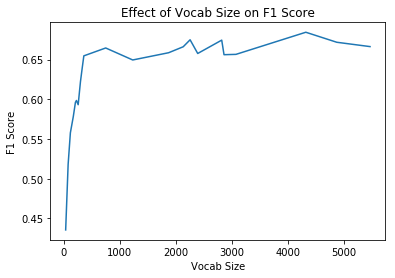

In [28]:
def P6():
    # Keep this random seed here to make comparison easier.
    np.random.seed(0)

    ### STUDENT START ###
    cv=CountVectorizer()
    feature_train=cv.fit_transform(train_data)
    feature_dev=cv.transform(dev_data)
    feature_names = cv.get_feature_names()
    C_list=[0.01, 0.02,0.03,0.04, .05,0.06,0.07,0.08,0.09, 0.1, 0.25, 0.5, 1, 1.25, 1.5, 1.75, 2, 2.5, 3, 5, 7, 10]
    
    
    vocab_size = []
    f1_scores = []  
    
    for c in C_list:
        print('C =', c)
        
        def log_reg(lnum):
            
            log_reg = LogisticRegression(penalty=lnum, C=c, tol=0.01)
            log_reg.fit(feature_train, train_labels)
            nonzero_weights = np.argwhere(log_reg.coef_!=0)
            print('\tNumber non-zero weights w/', lnum, 'penalty:', nonzero_weights.shape[0])
        
            if 'l1' == lnum:
                vocab_size.append(nonzero_weights.shape[0])
                vocab_idx = np.unique(nonzero_weights[:,-1])
                
                new_vocab = []
                for i in vocab_idx:
                    new_vocab.append(feature_names[i])
                    
                cv2 = CountVectorizer(vocabulary=new_vocab)
                feature_train2=cv2.fit_transform(train_data)
                feature_dev2=cv2.transform(dev_data)
                log_reg_l2 = LogisticRegression(penalty='l2', C=c, tol=0.01)
                log_reg_l2.fit(feature_train2, train_labels)
                pred = log_reg_l2.predict(feature_dev2)
                f1_scores.append(metrics.f1_score(pred, dev_labels, average='macro'))

                
        log_reg('l1')
        log_reg('l2')

    plt.plot(vocab_size, f1_scores)
    plt.title('Effect of Vocab Size on F1 Score')  
    plt.ylabel('F1 Score') 
    plt.xlabel('Vocab Size') 
    plt.show()

        
    ### STUDENT END ###
P6()

ANSWER: 

L1 results in significntly fewer non-zero weights compared to L2. The plot shown above highlights that the performance based on the F1 increases significantly as the vocb size increases from about 0 to ~500. Once the vocab size reaches that threshold the performancr don't progress much.  

(7) Use the TfidfVectorizer -- how is this different from the CountVectorizer? Train a logistic regression model with C=100.

Make predictions on the dev data and show the top 3 documents where the ratio R is largest, where R is:

maximum predicted probability / predicted probability of the correct label

What kinds of mistakes is the model making? Suggest a way to address one particular issue that you see.

In [36]:
def P7():
### STUDENT START ###

    cv = TfidfVectorizer()
    features_train = cv.fit_transform(train_data)
    features_dev =  cv.transform(dev_data)
    log_reg = LogisticRegression(C=100)
    log_reg.fit(features_train, train_labels)
    log_reg_pred = log_reg.predict(features_dev)
    
    print("F1 Score: ", metrics.f1_score(log_reg_pred, dev_labels, average = 'macro'), '\n')

    prob = log_reg.predict_proba(features_dev)
    max_prob = np.amax(prob, axis=1)
  
    R = []
    for i in range(prob.shape[0]):
        R.append(prob[i, dev_labels[i]])
     
    r_ratio = max_prob / R
    
    top_3_r_idx = np.argpartition(r_ratio, -3)[-3:]
    top_3_r = list(np.take(r_ratio, top_3_r_idx))
    
    for r in top_3_r_idx:
        print('*'*60, '\n')
        print("Ratio R =", top_3_r.pop(0), '\n')
        print("Predicted Category: ", newsgroups_train.target_names[log_reg_pred[r]])
        print("Correct Category: ", newsgroups_train.target_names[dev_labels[r]])
        print("\nDocument Text: ")
        print(dev_data[r], '\n')

        

    cm = confusion_matrix(log_reg_pred, dev_labels)
    print('*'*60, '\n')
    print("Confusion Matrix")
    print(newsgroups_train.target_names)
    print(cm)
## STUDENT END ###
P7()

F1 Score:  0.7473913101645842 

************************************************************ 

Ratio R = 287.1791925998367 

Predicted Category:  talk.religion.misc
Correct Category:  alt.atheism

Document Text: 

The 24 children were, of course, killed by a lone gunman in a second story
window, who fired eight bullets in the space of two seconds...
 

************************************************************ 

Ratio R = 325.00406840436005 

Predicted Category:  comp.graphics
Correct Category:  talk.religion.misc

Document Text: 
Can anyone provide me a ftp site where I can obtain a online version
of the Book of Mormon. Please email the internet address if possible. 

************************************************************ 

Ratio R = 929.3580586193167 

Predicted Category:  comp.graphics
Correct Category:  talk.religion.misc

Document Text: 
I am pleased to announce that a *revised version* of _The Easy-to-Read Book
of Mormon_ (former title: _Mormon's Book_) by Lynn Matthews A

ANSWER: TF-IDF goes beyond taking a simple count of the frequency of each word in the document. It also takes into account the frequency of the word in the corpus of documents. So it will weight the word higher if it appears frequently in the document, but infrequently in all other documents. 

According to the confusion matrix, the most common misclassifications were between religion and atheism. This makes sense considering the similar types of words between those two categories. The two largest R ratios were associated with religious topics that got confused with comp.graphics. Checking the documents, but mention computer related words such as FTP. Since we're using TF_IDF this makes sense that its inaccurately predicting these documents. Terms like FTP and ASCII is infrequently used in general documents, but much more likely in documents related to computers. The text that was mis-categorized, was religious content, but that was discussing stuff related to computers such as FTP. 

There are a few options to improve the model. 
1. Remove features that have a high true positive, but also a high false positive rate. These are features that are predictive of the category, but are also used enough in other categories that it drives false positives. 
2. Remove stop words
3. For the misclassification of religion as comp.graphics, its likely due to terms like FTP having a higher weight then terms like Book of Mormom. One option would be to identify those proper nouns and weight them higher. 

(8) EXTRA CREDIT

Try implementing one of your ideas based on your error analysis. Use logistic regression as your underlying model.